<a href="https://colab.research.google.com/github/AchmadAinunNaim/Semester5_PCVK/blob/main/Minggu06/Praktikum__06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tugas Praktikum 06**

## **TUGAS 01**

In [2]:
from google.colab import drive

# accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **TUGAS 02**

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## **TUGAS 03**

<BarContainer object of 256 artists>

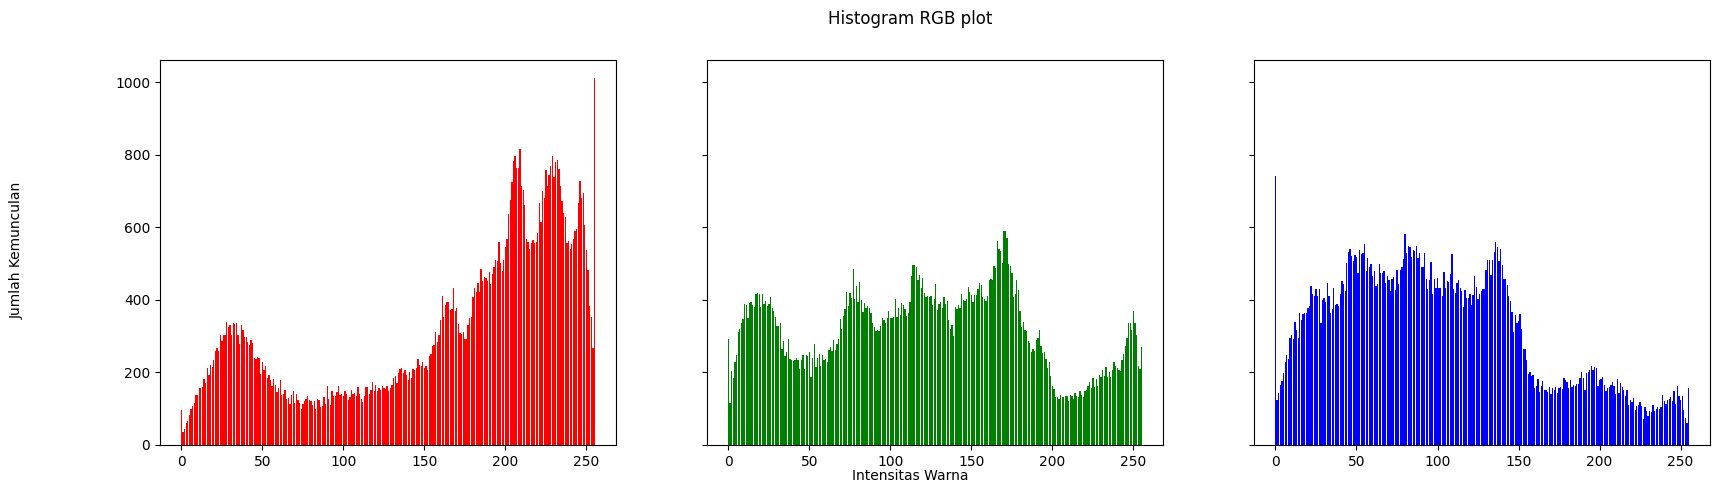

In [4]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg')
height, width, depth = np.shape(image)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[image[y][x][0]] += 1
    green[image[y][x][1]] += 1
    red[image[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

## **TUGAS 04**

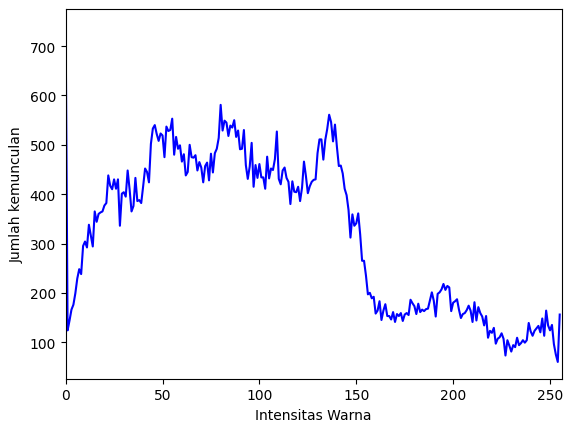

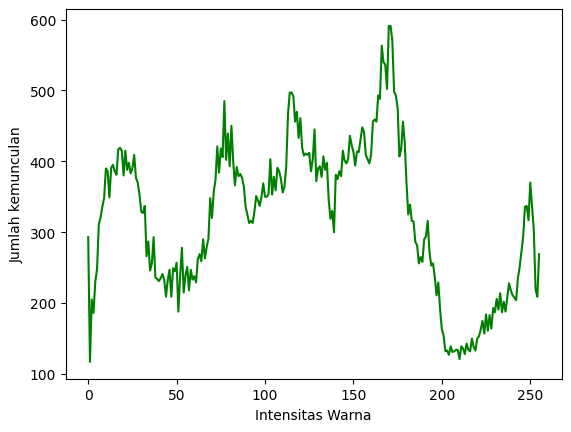

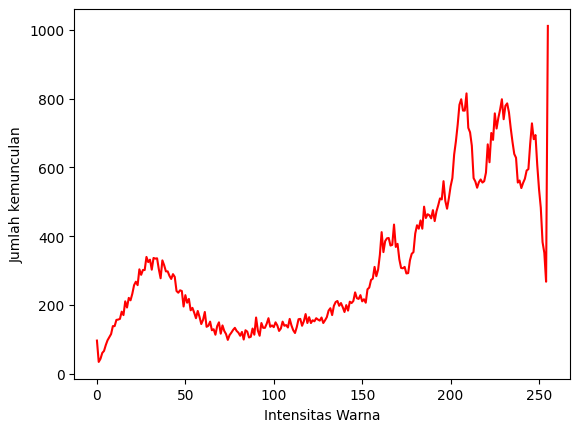

In [5]:
colors = ("b","g","r")
channel_ids = (0, 1, 2)

plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      image[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

## **TUGAS 05**

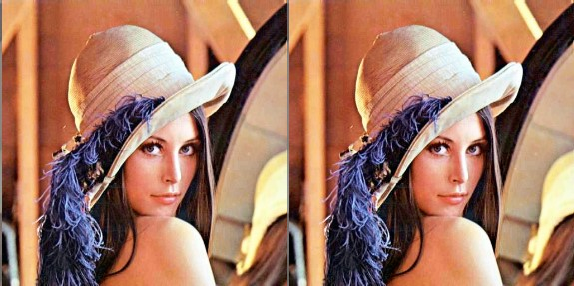

<BarContainer object of 256 artists>

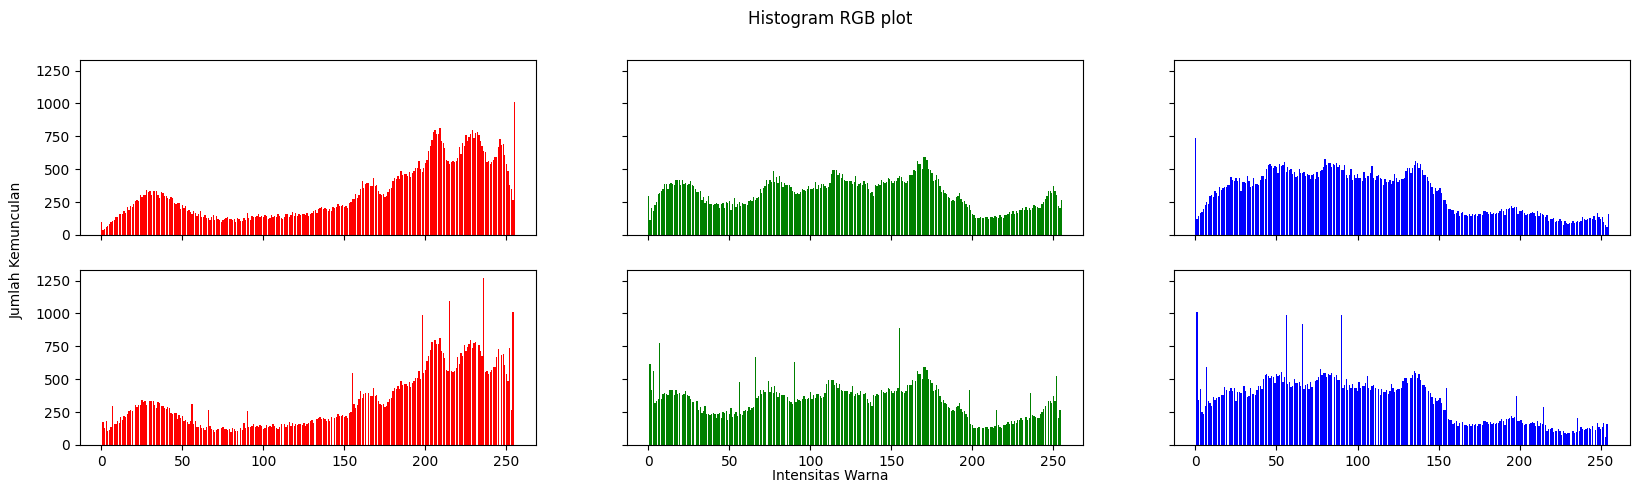

In [18]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(img)

img_array = np.asarray(img)


histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array)
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array
equal_histo = histog(img2)
final_frame = cv.hconcat((img, img2))
cv2_imshow(final_frame)

names = np.arange (256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

## **TUGAS 06**

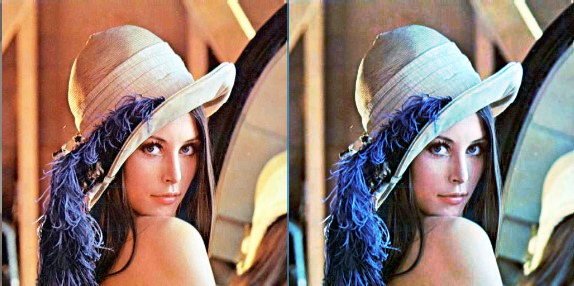

<BarContainer object of 256 artists>

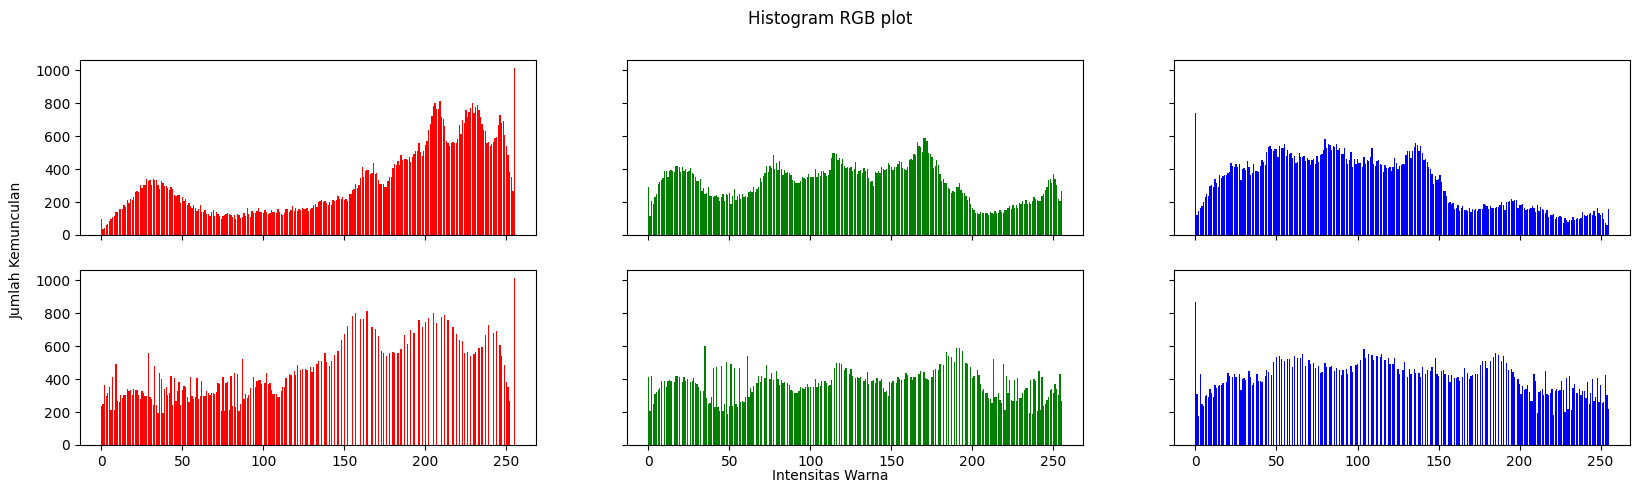

In [21]:
img  = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for h in range(0,height):
    for w in range(0,width):
      ax[0][img1[h][w][0]] += 1
      ax[1][img1[h][w][1]] += 1
      ax[2][img1[h][w][2]] += 1
  return ax

histo_asli = histog(img)

channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

## **TUGAS 07**

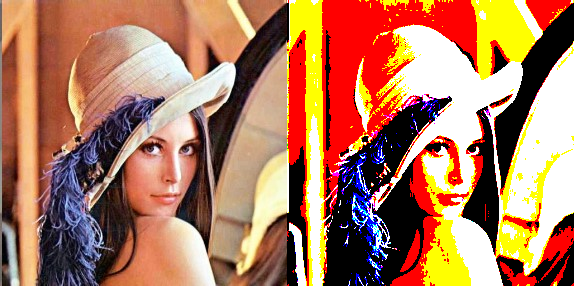

In [9]:
lena_original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = cv.cvtColor(lena_original, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for y in range(0, img_16jt.shape[0]):
  for x in range(0, img_16jt.shape[1]):
    baru = warnaTerdekat(img_16jt[y, x, 0], img_16jt[y, x, 1], img_16jt[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16jt = cv.cvtColor(img_16jt, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16jt, img_8))
cv2_imshow(final_frame)



## **TUGAS 08**

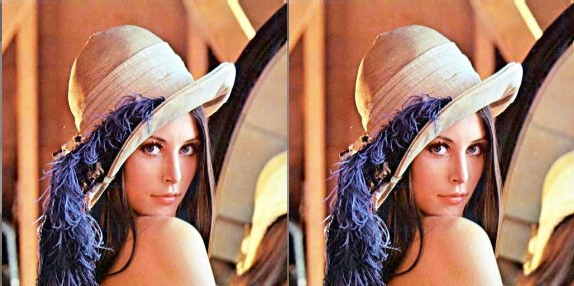

In [11]:
from PIL import Image

# Load image and convert it to RGB using Floyd-Steinberg dithering
imageConvert = Image.open('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg').convert(mode='RGB', dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena2.jpg')

# Load the original image
ImageOriginal = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg')

# Load the dithered image
ImageDithered = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg')

# Display the original and dithered images
final_frame = cv.hconcat((ImageOriginal, ImageDithered))
cv2_imshow(final_frame)

## **Tugas 09**

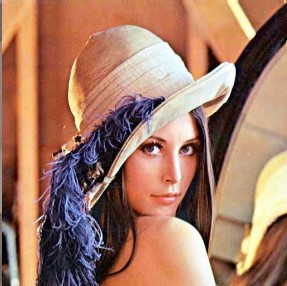

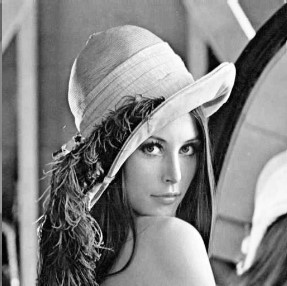

In [10]:
img_ori = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg')

img_gray= cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg', cv.IMREAD_GRAYSCALE)

# Display the img_ori and img_gray
cv2_imshow(img_ori)
cv2_imshow(img_gray)

Convert dari image lena_lc ke grayscale <PIL.Image.Image image mode=1 size=287x286 at 0x7EAE702B7C70>
Hasil Dithering dengan jarak tetangga 1 pixel


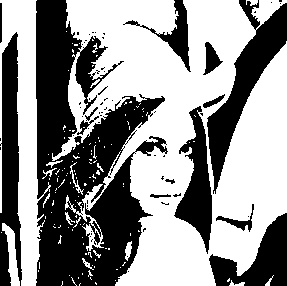

In [28]:
from PIL import Image
import cv2

imageWiki = Image.open('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena2.jpg').convert(mode='1',dither=Image.FLOYDSTEINBERG)
imageWiki.save('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena.jpg')


Image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena2.jpg')
Image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena2.jpg')
image_2 = cv.cvtColor(Image2, cv.COLOR_BGR2RGB)

FloydSteinberg = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena2.jpg', FloydSteinberg)

img_gray = print('Convert dari image lena_lc ke grayscale', imageWiki)

# implementasikan proses dithering Floyd and Steinberg
Height = FloydSteinberg.shape[0]
Width = FloydSteinberg.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = FloydSteinberg[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        FloydSteinberg[y, x] = new_value

        Error = old_value - new_value


# cv2.imshow(Image)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu06/gambar lena2.jpg', FloydSteinberg)
print('Hasil Dithering dengan jarak tetangga 1 pixel')
cv2_imshow(FloydSteinberg)